<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_1.2_n250.csv',
 'data_add_delta_1.2_n120.csv',
 'data_add_delta_1.2_n60.csv',
 'data_add_delta_1.2_n30.csv',
 'data_add_delta_1.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,53.719188,38.023944,-0.846381,100.896751,102.445207,-1.548456
1,0.0,1.0,31.310188,78.815589,2.788538,122.914314,119.754184,3.160130
2,0.0,2.0,63.936957,88.575297,-2.596338,159.915915,162.366675,-2.450760
3,0.0,3.0,38.761374,41.989058,13.596936,104.347368,91.185692,13.161676
4,0.0,4.0,20.626852,48.889496,10.991171,90.507520,79.587650,10.919870
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.598586,85.852087,7.148574,171.599247,163.620102,7.979145
249996,999.0,246.0,65.947034,65.500863,12.456762,153.904659,140.992454,12.912205
249997,999.0,247.0,45.946748,51.776334,26.731514,134.454596,107.885599,26.568997
249998,999.0,248.0,81.440573,39.476953,9.236445,140.153971,130.563323,9.590648


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,53.719188,38.023944,-0.846381,100.896751,102.445207,-1.548456
1,0.0,1.0,31.310188,78.815589,2.788538,122.914314,119.754184,3.160130
2,0.0,2.0,63.936957,88.575297,-2.596338,159.915915,162.366675,-2.450760
3,0.0,3.0,38.761374,41.989058,13.596936,104.347368,91.185692,13.161676
4,0.0,4.0,20.626852,48.889496,10.991171,90.507520,79.587650,10.919870
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.598586,85.852087,7.148574,171.599247,163.620102,7.979145
249996,999.0,246.0,65.947034,65.500863,12.456762,153.904659,140.992454,12.912205
249997,999.0,247.0,45.946748,51.776334,26.731514,134.454596,107.885599,26.568997
249998,999.0,248.0,81.440573,39.476953,9.236445,140.153971,130.563323,9.590648


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    53.719188  38.023944  -0.846381  100.896751  102.445207   
      1.0    31.310188  78.815589   2.788538  122.914314  119.754184   
      2.0    63.936957  88.575297  -2.596338  159.915915  162.366675   
      3.0    38.761374  41.989058  13.596936  104.347368   91.185692   
      4.0    20.626852  48.889496  10.991171   90.507520   79.587650   
...                ...        ...        ...         ...         ...   
999.0 245.0  68.598586  85.852087   7.148574  171.599247  163.620102   
      246.0  65.947034  65.500863  12.456762  153.904659  140.992454   
      247.0  45.946748  51.776334  26.731514  134.454596  107.885599   
      248.0  81.440573  39.476953   9.236445  140.153971  130.563323   
      249.0  30.615125  89.083441 -30.966422   98.732144  129.578080   

                 e_hat  
rep   index             
0.0   0.0    -1.548456  
      1.0     3.160130  
      2.0    -2.450760  
      3.0    13.161676  
      4.0    10.919870  
...                ...  
999.0 245.0   7.979145  
      246.0  12.912205  
      247.0  26.568997  
      248.0   9.590648  
      249.0 -30.845936  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    53.719188  38.023944  -0.846381  100.896751  102.445207   
      1.0    31.310188  78.815589   2.788538  122.914314  119.754184   
      2.0    63.936957  88.575297  -2.596338  159.915915  162.366675   
      3.0    38.761374  41.989058  13.596936  104.347368   91.185692   
      4.0    20.626852  48.889496  10.991171   90.507520   79.587650   
...                ...        ...        ...         ...         ...   
999.0 245.0  68.598586  85.852087   7.148574  171.599247  163.620102   
      246.0  65.947034  65.500863  12.456762  153.904659  140.992454   
      247.0  45.946748  51.776334  26.731514  134.454596  107.885599   
      248.0  81.440573  39.476953   9.236445  140.153971  130.563323   
      249.0  30.615125  89.083441 -30.966422   98.732144  129.578080   

                 e_hat  
rep   index             
0.0   0.0    -1.548456  
      1.0     3.160130  
      2.0    -2.450760  
      3.0    13.161676  
      4.0    10.919870  
...                ...  
999.0 245.0   7.979145  
      246.0  12.912205  
      247.0  26.568997  
      248.0   9.590648  
      249.0 -30.845936  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,53.719188,38.023944,-0.846381,100.896751,102.445207,-1.548456
1,0.0,1.0,31.310188,78.815589,2.788538,122.914314,119.754184,3.160130
2,0.0,2.0,63.936957,88.575297,-2.596338,159.915915,162.366675,-2.450760
3,0.0,3.0,38.761374,41.989058,13.596936,104.347368,91.185692,13.161676
4,0.0,4.0,20.626852,48.889496,10.991171,90.507520,79.587650,10.919870
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.598586,85.852087,7.148574,171.599247,163.620102,7.979145
249996,999.0,246.0,65.947034,65.500863,12.456762,153.904659,140.992454,12.912205
249997,999.0,247.0,45.946748,51.776334,26.731514,134.454596,107.885599,26.568997
249998,999.0,248.0,81.440573,39.476953,9.236445,140.153971,130.563323,9.590648


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    53.719188  38.023944  -0.846381  100.896751  102.445207   
      1.0    31.310188  78.815589   2.788538  122.914314  119.754184   
      2.0    63.936957  88.575297  -2.596338  159.915915  162.366675   
      3.0    38.761374  41.989058  13.596936  104.347368   91.185692   
      4.0    20.626852  48.889496  10.991171   90.507520   79.587650   
...                ...        ...        ...         ...         ...   
999.0 245.0  68.598586  85.852087   7.148574  171.599247  163.620102   
      246.0  65.947034  65.500863  12.456762  153.904659  140.992454   
      247.0  45.946748  51.776334  26.731514  134.454596  107.885599   
      248.0  81.440573  39.476953   9.236445  140.153971  130.563323   
      249.0  30.615125  89.083441 -30.966422   98.732144  129.578080   

                 e_hat  
rep   index             
0.0   0.0    -1.548456  
      1.0     3.160130  
      2.0    -2.450760  
      3.0    13.161676  
      4.0    10.919870  
...                ...  
999.0 245.0   7.979145  
      246.0  12.912205  
      247.0  26.568997  
      248.0   9.590648  
      249.0 -30.845936  

[250000 rows x 6 columns]

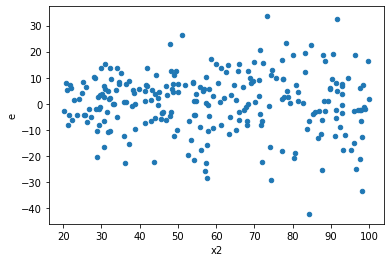

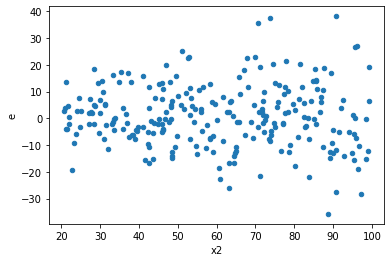

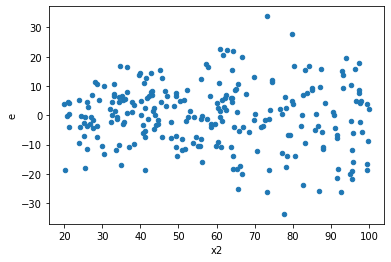

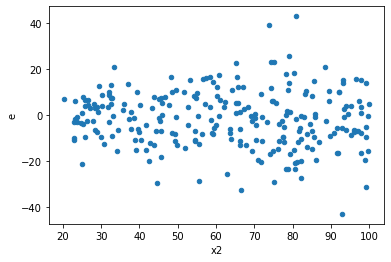

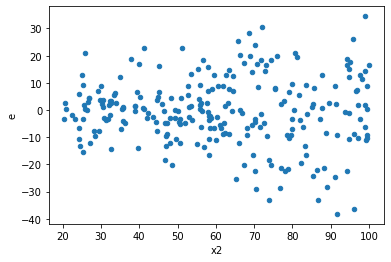

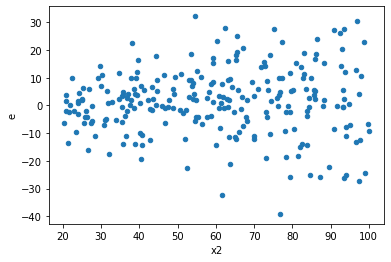

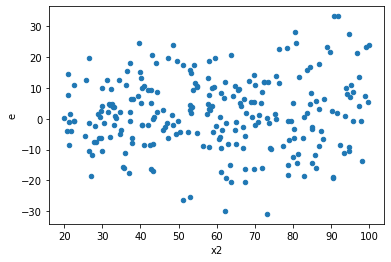

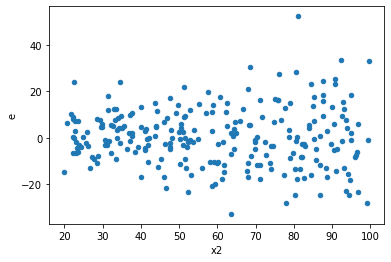

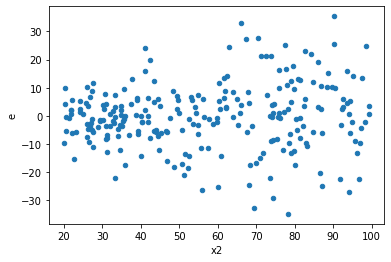

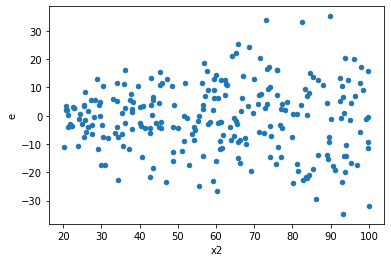

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,9556.042343982448,17153.520699399774,97.5106361630862,175.03592550407933,1.7950444422425094,0.004127937746705612,0.9979360311266472,0.002063968873352806,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,10252.902424131044,18380.04791846355,104.62145330745963,187.55150937207705,1.792667788898937,0.004212297831678313,0.9978938510841608,0.0021061489158391566,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,8056.9820134549955,13818.766617198336,82.2141021781122,141.00782262447282,1.71512938642798,0.008104662232823356,0.9959476688835883,0.004052331116411678,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,11874.545575057637,15541.219505100784,121.16883239854731,158.5838725010284,1.308784357840603,0.18464560362867033,0.9076771981856648,0.09232280181433516,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,11278.77795929828,20012.719534879052,115.08957101324776,204.21142382529644,1.7743694934946799,0.004920683152939143,0.9975396584235304,0.0024603415764695713,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,9893.479348218267,15357.308321040318,100.9538709001864,156.70722776571753,1.5522656671645088,0.030594501974052335,0.9847027490129738,0.015297250987026167,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,10154.490621717545,15864.12928977519,103.61725124201577,161.87887030382848,1.5622772112119898,0.02825939244096487,0.9858703037795176,0.014129696220482435,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,12509.322617349004,19695.784237160897,127.64614915662249,200.9773901751112,1.5744884706902587,0.025639399986319145,0.9871803000068404,0.012819699993159572,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,6909.227775399152,15751.584712192958,70.50232423876686,160.7304562468669,2.2797894676851893,5.98782840881551e-05,0.9999700608579559,2.993914204407755e-05,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,9556.042343982448,17153.520699399774,97.5106361630862,175.03592550407933,1.7950444422425094,0.004127937746705612,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,10252.902424131044,18380.04791846355,104.62145330745963,187.55150937207705,1.792667788898937,0.004212297831678313,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,8056.9820134549955,13818.766617198336,82.2141021781122,141.00782262447282,1.71512938642798,0.008104662232823356,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,11874.545575057637,15541.219505100784,121.16883239854731,158.5838725010284,1.308784357840603,0.18464560362867033,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,11278.77795929828,20012.719534879052,115.08957101324776,204.21142382529644,1.7743694934946799,0.004920683152939143,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,9893.479348218267,15357.308321040318,100.9538709001864,156.70722776571753,1.5522656671645088,0.030594501974052335,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,10154.490621717545,15864.12928977519,103.61725124201577,161.87887030382848,1.5622772112119898,0.02825939244096487,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,12509.322617349004,19695.784237160897,127.64614915662249,200.9773901751112,1.5744884706902587,0.025639399986319145,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,6909.227775399152,15751.584712192958,70.50232423876686,160.7304562468669,2.2797894676851893,5.98782840881551e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    688
Reject001=1 : Homoscedasticity      312
Name: Result_test, dtype: int64